<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Podcast Listening Time Prediction</font></h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# 1. About the Data

**Data Source**

[Kaggle](https://www.kaggle.com/competitions/playground-series-s5e4/data)

**Data Description**

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Podcast Listening Time Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

---

Files

- train.csv - the training dataset; Listening_Time_minutes is the target

- test.csv - the test dataset; your objective is to predict the Listening_Time_minutes for each row

- sample_submission.csv - a sample submission file in the correct format.

**Data Dictionary**
| Variable                         | Description                                                    |
|--------------------------------|------------------------------------------------------------------|
| id                             | Unique identifier for each episode record                        |
| Podcast_Name                   | Name of the podcast                                              |
| Episode_Title                  | Title or episode number                                          |
| Episode_Length_minutes         | Duration of the episode in minutes                               |
| Genre                          | Content genre/category of the episode                            |
| Host_Popularity_percentage     | Popularity score of the host (as a percentage)                   |
| Publication_Day                | Day of the week when the episode was published                   |
| Publication_Time               | Time of day when the episode was published (e.g., Morning, Night)|
| Guest_Popularity_percentage    | Popularity score of the guest (as a percentage)                  |
| Number_of_Ads                  | Number of advertisement breaks in the episode                    |
| Episode_Sentiment              | Sentiment polarity of the episode content (Positive/Neutral/Negative) |
| Listening_Time_minutes         | Total minutes listeners spent listening to the episode           |


**Importing Dataset**

In [3]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

In [4]:
train_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [5]:
test_df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


Note:
- There are 6 numerical features and 6 object features.
- There are some missing values on features Episode_Length_minutes, Guest_Popularity_percentage, Number_of_Ads

In [7]:
train_df.describe(include='all')

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,750000.000000,750000,750000,662907.000000,750000,750000.000000,750000,750000,603970.000000,749999.000000,750000,750000.000000
unique,NaN,48,100,NaN,10,NaN,7,4,NaN,NaN,3,NaN
top,NaN,Tech Talks,Episode 71,NaN,Sports,NaN,Sunday,Night,NaN,NaN,Neutral,NaN
freq,NaN,22847,10515,NaN,87606,NaN,115946,196849,NaN,NaN,251291,NaN
mean,374999.500000,NaN,NaN,64.504738,NaN,59.859901,NaN,NaN,52.236449,1.348855,NaN,45.437406
std,216506.495284,NaN,NaN,32.969603,NaN,22.873098,NaN,NaN,28.451241,1.151130,NaN,27.138306
min,0.000000,NaN,NaN,0.000000,NaN,1.300000,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,187499.750000,NaN,NaN,35.730000,NaN,39.410000,NaN,NaN,28.380000,0.000000,NaN,23.178350
50%,374999.500000,NaN,NaN,63.840000,NaN,60.050000,NaN,NaN,53.580000,1.000000,NaN,43.379460
75%,562499.250000,NaN,NaN,94.070000,NaN,79.530000,NaN,NaN,76.600000,2.000000,NaN,64.811580


Note: 
- There might be errors on Host_Popularity_percentage and Guest_Popularity_percentage features, as their maximum percentage respectively are 119.46 and 119.91, which should be maxed at 100 (?)
- There might be outliers on Number_of_Ads, as its max value is 103.91, which is quite distinct from the 3rd quantile.
- There might also be an error on Episode_Length_minutes feature, as its minimum value is 0.0, which is might be impossible for a podcast.

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           250000 non-null  int64  
 1   Podcast_Name                 250000 non-null  object 
 2   Episode_Title                250000 non-null  object 
 3   Episode_Length_minutes       221264 non-null  float64
 4   Genre                        250000 non-null  object 
 5   Host_Popularity_percentage   250000 non-null  float64
 6   Publication_Day              250000 non-null  object 
 7   Publication_Time             250000 non-null  object 
 8   Guest_Popularity_percentage  201168 non-null  float64
 9   Number_of_Ads                250000 non-null  float64
 10  Episode_Sentiment            250000 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 21.0+ MB


Note:
- There are missing values on features Episode_Length_minutes and Guest_Popularity_percentage

In [9]:
test_df.describe(include='all')

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
count,250000.000000,250000,250000,2.212640e+05,250000,250000.000000,250000,250000,201168.000000,250000.000000,250000
unique,NaN,48,100,NaN,10,NaN,7,4,NaN,NaN,3
top,NaN,Tech Talks,Episode 71,NaN,Sports,NaN,Sunday,Night,NaN,NaN,Neutral
freq,NaN,7553,3492,NaN,28903,NaN,38906,65440,NaN,NaN,83671
mean,874999.500000,NaN,NaN,4.192987e+02,NaN,59.716491,NaN,NaN,52.192796,1.355852,NaN
std,72168.927986,NaN,NaN,1.668545e+05,NaN,22.880028,NaN,NaN,28.445034,4.274399,NaN
min,750000.000000,NaN,NaN,2.470000e+00,NaN,2.490000,NaN,NaN,0.000000,0.000000,NaN
25%,812499.750000,NaN,NaN,3.578000e+01,NaN,39.250000,NaN,NaN,28.320000,0.000000,NaN
50%,874999.500000,NaN,NaN,6.397000e+01,NaN,59.900000,NaN,NaN,53.360000,1.000000,NaN
75%,937499.250000,NaN,NaN,9.415000e+01,NaN,79.390000,NaN,NaN,76.560000,2.000000,NaN


Note:
- There might be outliers on Episode_Length_minutes feature, as the max value is 78486264.0, which is impossible for a podcast.
- The Host_Popularity_percentage and Guest_Popularity_percnetage might also have errors, as the maximum values respectively are 117.76 and 116.82, which should be max at 100.0 (?)
- The Number_of_Ads feature might also have outliers, as the max value is 2063, which is very distinct from the 3rd quantile.

# 2. Objectives

The main objective of this analysis is to develop a predictive model that accurately predict the podcast listening time. The focus will be on ***prediction***, meaning the goal is to minimize the model's RMSE in predicting podcast listening time rather than interpreting the underlying relationships between variables. The primary metric for evaluation will be ***RMSE***, ensuring that the model correctly predicts podcast listening time with with the lowest possible error.

# 3. Models

## a. Data Cleaning

### 1) Handling Duplicates

In [10]:
train_df.duplicated().sum()

np.int64(0)

In [11]:
test_df.duplicated().sum()

np.int64(0)

### 2) Handling Missing Values

In [12]:
train_df.isnull().sum()

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [13]:
# Imputation on missing values, we will imputate with median, because there are outliers in the data and median is less sensitive to outliers
train_impute = train_df.copy()

# Episode_Length_minutes: Impute with median
train_impute['Episode_Length_minutes'].fillna(train_impute['Episode_Length_minutes'].median(), inplace=True)

# Guest_Popularity_percentage: Impute with median
train_impute['Guest_Popularity_percentage'].fillna(train_impute['Guest_Popularity_percentage'].median(), inplace=True)

# Number_of_Ads: Impute with median
train_impute['Number_of_Ads'].fillna(train_impute['Number_of_Ads'].median(), inplace=True)

train_impute.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
Listening_Time_minutes         0
dtype: int64

In [14]:
test_df.isnull().sum()

id                                 0
Podcast_Name                       0
Episode_Title                      0
Episode_Length_minutes         28736
Genre                              0
Host_Popularity_percentage         0
Publication_Day                    0
Publication_Time                   0
Guest_Popularity_percentage    48832
Number_of_Ads                      0
Episode_Sentiment                  0
dtype: int64

In [15]:
test_impute = test_df.copy()

# Episode_Length_minutes: Impute with median
test_impute['Episode_Length_minutes'].fillna(test_impute['Episode_Length_minutes'].median(), inplace=True)

# Guest_Popularity_percentage: Impute with median
test_impute['Guest_Popularity_percentage'].fillna(test_impute['Guest_Popularity_percentage'].median(), inplace=True)

test_impute.isnull().sum()

id                             0
Podcast_Name                   0
Episode_Title                  0
Episode_Length_minutes         0
Genre                          0
Host_Popularity_percentage     0
Publication_Day                0
Publication_Time               0
Guest_Popularity_percentage    0
Number_of_Ads                  0
Episode_Sentiment              0
dtype: int64

### 3) Handling Outliers

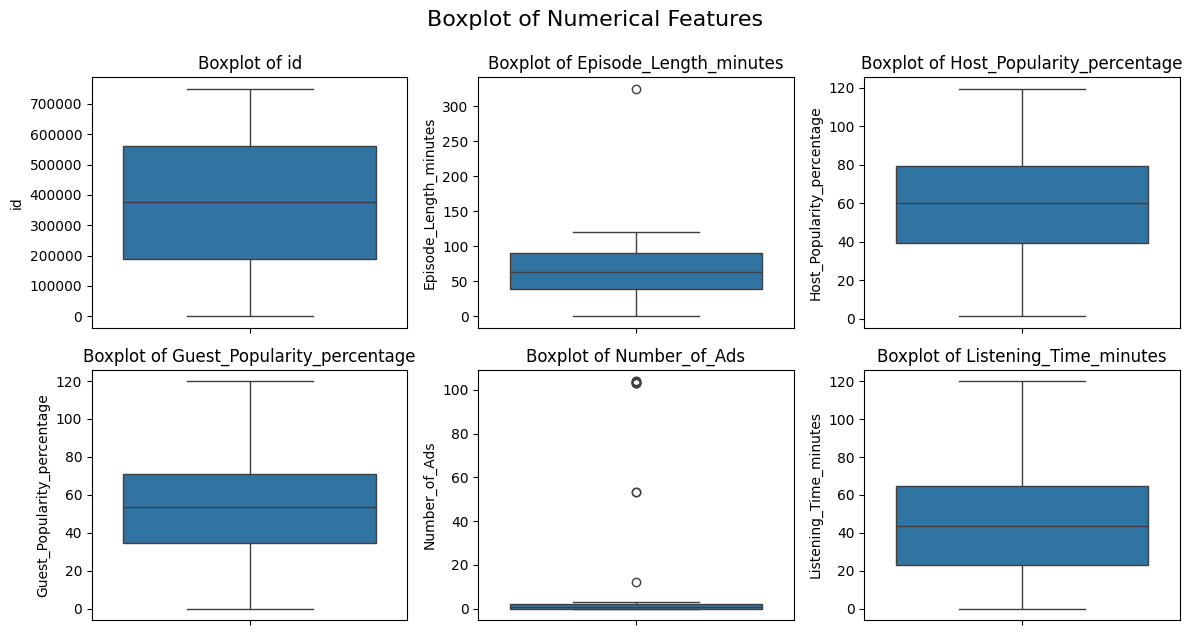

In [16]:
# Checking for outliers with boxplot
train_numerical_features = train_impute.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
for i, feature in enumerate(train_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_impute[feature])
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Boxplot of Numerical Features', y=1.05, fontsize=16)
plt.show()

In [17]:
train_cleaned = train_impute.copy()

# Episode_Length_minutes: Remove outliers with IQR Method
eps_Q1 = train_cleaned['Episode_Length_minutes'].quantile(0.25)
eps_Q3 = train_cleaned['Episode_Length_minutes'].quantile(0.75)
eps_IQR = eps_Q3 - eps_Q1
eps_lower_bound = eps_Q1 - 1.5 * eps_IQR
eps_upper_bound = eps_Q3 + 1.5 * eps_IQR
train_cleaned = train_cleaned[(train_cleaned['Episode_Length_minutes'] >= eps_lower_bound) & (train_cleaned['Episode_Length_minutes'] <= eps_upper_bound)]

# Host_Popularity_percentage: Cap the outliers >100 to 100
train_cleaned.loc[train_cleaned['Host_Popularity_percentage'] > 100, 'Host_Popularity_percentage'] = 100

# Guest_Popularity_percentage: Cap the outliers >100 to 100
train_cleaned.loc[train_cleaned['Guest_Popularity_percentage'] > 100, 'Guest_Popularity_percentage'] = 100

# Number_of_Ads: Remove outliers with IQR Method
ads_Q1 = train_cleaned['Number_of_Ads'].quantile(0.25)
ads_Q3 = train_cleaned['Number_of_Ads'].quantile(0.75)
ads_IQR = ads_Q3 - ads_Q1
ads_lower_bound = ads_Q1 - 1.5 * ads_IQR
ads_upper_bound = ads_Q3 + 1.5 * ads_IQR
train_cleaned = train_cleaned[(train_cleaned['Number_of_Ads'] >= ads_lower_bound) & (train_cleaned['Number_of_Ads'] <= ads_upper_bound)]


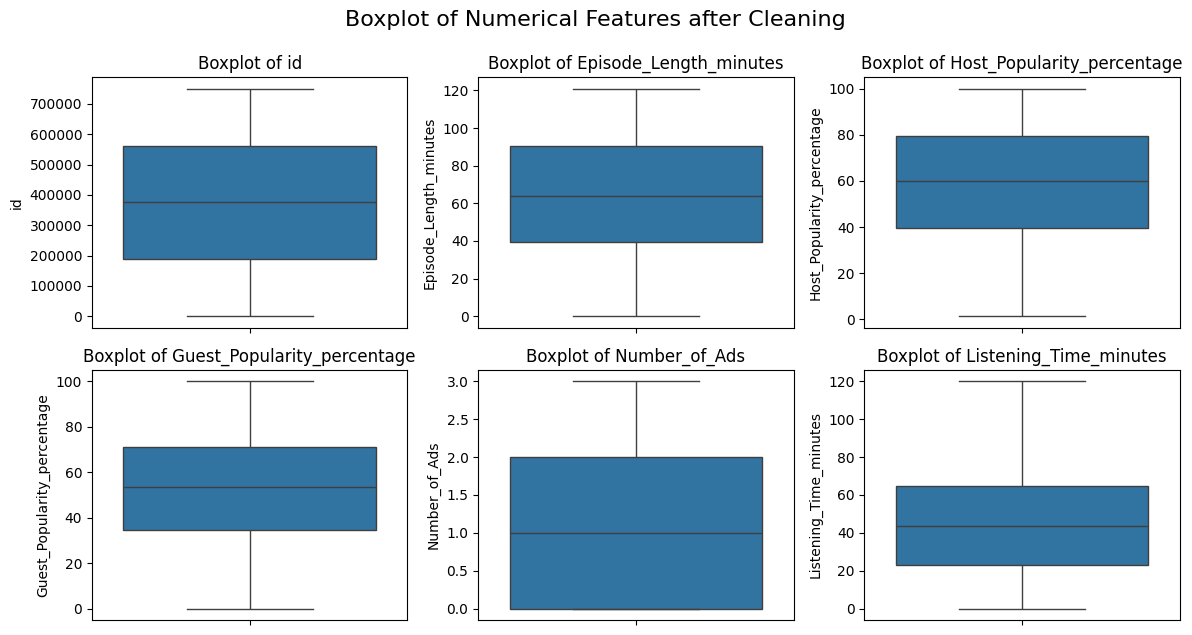

In [18]:
# Checking for outliers with boxplot after cleaning
plt.figure(figsize=(12, 6))
for i, feature in enumerate(train_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_cleaned[feature])
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Boxplot of Numerical Features after Cleaning', y=1.05, fontsize=16)
plt.show()

In [19]:
train_cleaned.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,749990.000000,749990.000000,749990.000000,749990.000000,749990.000000,749990.000000
mean,374998.377742,64.426877,59.859695,52.497950,1.347886,45.436956
std,216506.624482,30.995390,22.872245,25.536584,1.110967,27.137945
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187498.250000,39.420000,39.410000,34.550000,0.000000,23.178350
50%,374997.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562497.750000,90.310000,79.530000,71.040000,2.000000,64.811580
max,749999.000000,120.930000,100.000000,100.000000,3.000000,119.970000


Note: The minimum Episode_Length_minutes is 0.0, which is impossible, we could delete them.

In [20]:
train_cleaned[train_cleaned['Episode_Length_minutes'] == 0]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
150178,150178,Fashion Forward,Episode 16,0.0,Lifestyle,46.97,Friday,Afternoon,53.58,0.0,Negative,9.60684


In [21]:
train_cleaned = train_cleaned[train_cleaned['Episode_Length_minutes'] != 0]
train_cleaned.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,749989.000000,749989.000000,749989.000000,749989.000000,749989.000000,749989.000000
mean,374998.677507,64.426963,59.859713,52.497948,1.347888,45.437004
std,216506.613184,30.995321,22.872255,25.536601,1.110966,27.137931
min,0.000000,1.240000,1.300000,0.000000,0.000000,0.000000
25%,187499.000000,39.420000,39.410000,34.550000,0.000000,23.178350
50%,374998.000000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562498.000000,90.310000,79.530000,71.040000,2.000000,64.811580
max,749999.000000,120.930000,100.000000,100.000000,3.000000,119.970000


Great! It's now become 1.24 minutes.

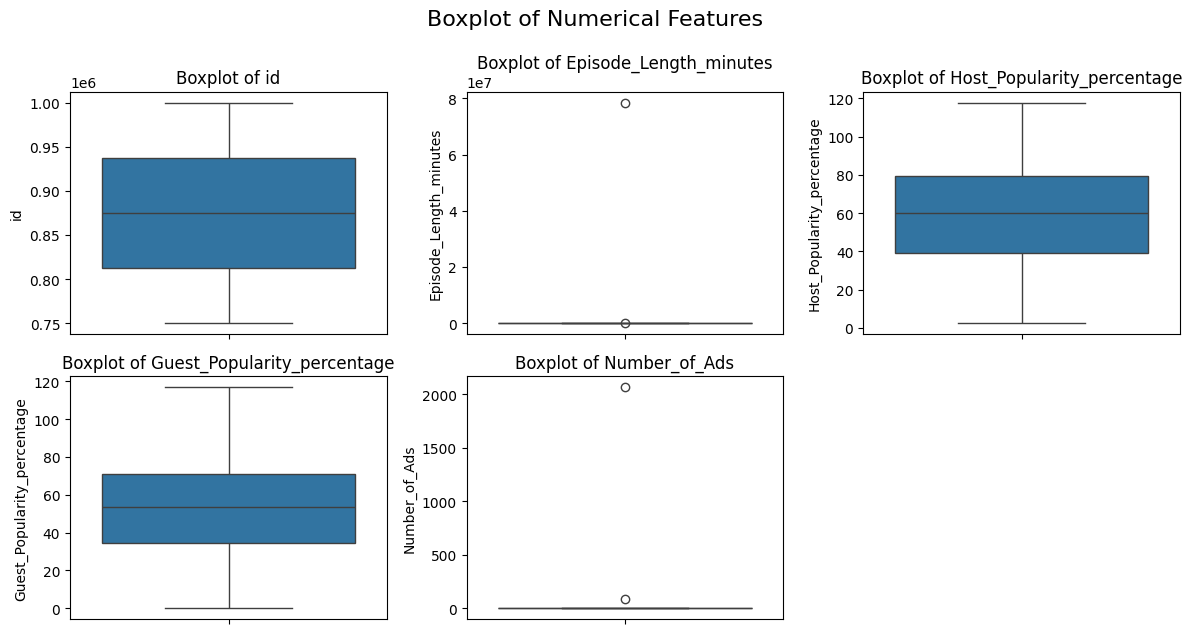

In [22]:
test_numerical_features = test_impute.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 6))
for i, feature in enumerate(test_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=test_impute[feature])
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Boxplot of Numerical Features', y=1.05, fontsize=16)
plt.show()

In [23]:
test_cleaned = test_impute.copy()

# We can only do capping for the test set, because we cannot remove rows from the test set
# Episode_Length_minutes: Cap the outliers with IQR method (using the same bounds as train set)
test_cleaned.loc[test_cleaned['Episode_Length_minutes'] < eps_lower_bound, 'Episode_Length_minutes'] = eps_lower_bound
test_cleaned.loc[test_cleaned['Episode_Length_minutes'] > eps_upper_bound, 'Episode_Length_minutes'] = eps_upper_bound

# Host_Popularity_percentage: Cap the outliers >100 to 100
test_cleaned.loc[test_cleaned['Host_Popularity_percentage'] > 100, 'Host_Popularity_percentage'] = 100

# Guest_Popularity_percentage: Cap the outliers >100 to 100
test_cleaned.loc[test_cleaned['Guest_Popularity_percentage'] > 100, 'Guest_Popularity_percentage'] = 100

# Number_of_Ads: Cap the outliers with IQR method (using the same bounds as train set)
test_cleaned.loc[test_cleaned['Number_of_Ads'] < ads_lower_bound, 'Number_of_Ads'] = ads_lower_bound
test_cleaned.loc[test_cleaned['Number_of_Ads'] > ads_upper_bound, 'Number_of_Ads'] = ads_upper_bound

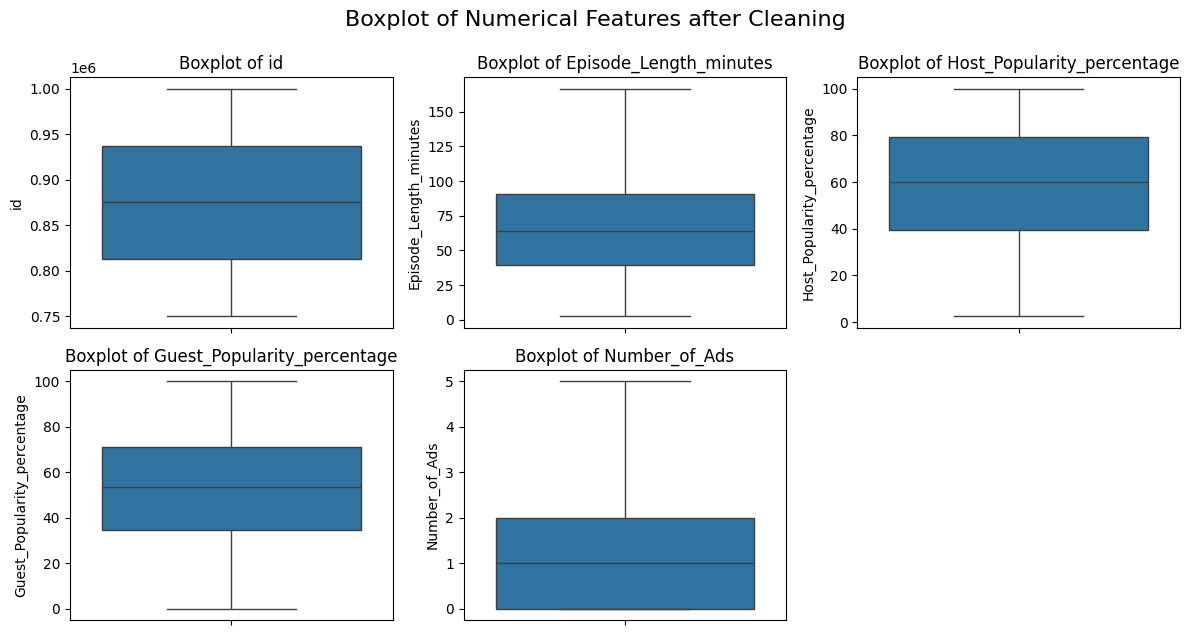

In [24]:
# Checking for outliers with boxplot after cleaning
plt.figure(figsize=(12, 6))
for i, feature in enumerate(test_numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=test_cleaned[feature])
    plt.title(f"Boxplot of {feature}")
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Boxplot of Numerical Features after Cleaning', y=1.05, fontsize=16)
plt.show()

In [25]:
test_cleaned.describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,64.481811,59.716117,52.420492,1.347284
std,72168.927986,31.003148,22.879264,25.519744,1.112713
min,750000.000000,2.470000,2.490000,0.000000,0.000000
25%,812499.750000,39.370000,39.250000,34.550000,0.000000
50%,874999.500000,63.970000,59.900000,53.360000,1.000000
75%,937499.250000,90.510000,79.390000,70.990000,2.000000
max,999999.000000,166.645000,100.000000,100.000000,5.000000


## b. EDA

### 1) Checking the Target Variable Distribution

In [26]:
train_cleaned

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,53.58,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,53.58,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


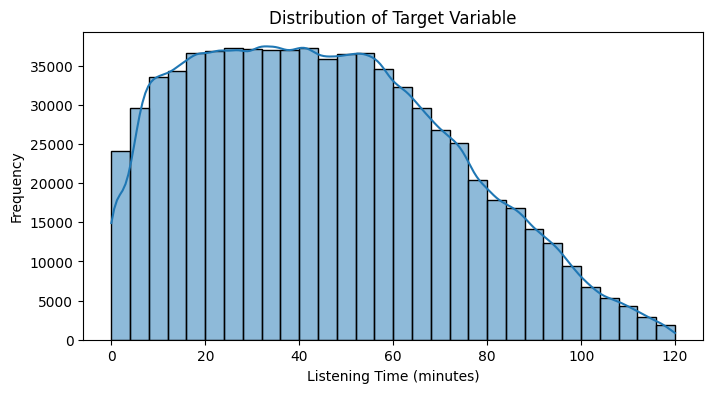

In [27]:
# Checking the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.histplot(train_cleaned['Listening_Time_minutes'], bins=30, kde=True)
plt.title('Distribution of Target Variable')
plt.xlabel('Listening Time (minutes)')
plt.ylabel('Frequency')
plt.show()

Note: The distribution is right skewed

In [28]:
train_cleaned.describe(include='all')

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
count,749989.000000,749989,749989,749989.000000,749989,749989.000000,749989,749989,749989.000000,749989.000000,749989,749989.000000
unique,NaN,48,100,NaN,10,NaN,7,4,NaN,NaN,3,NaN
top,NaN,Tech Talks,Episode 71,NaN,Sports,NaN,Sunday,Night,NaN,NaN,Neutral,NaN
freq,NaN,22847,10515,NaN,87605,NaN,115944,196849,NaN,NaN,251284,NaN
mean,374998.677507,NaN,NaN,64.426963,NaN,59.859713,NaN,NaN,52.497948,1.347888,NaN,45.437004
std,216506.613184,NaN,NaN,30.995321,NaN,22.872255,NaN,NaN,25.536601,1.110966,NaN,27.137931
min,0.000000,NaN,NaN,1.240000,NaN,1.300000,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,187499.000000,NaN,NaN,39.420000,NaN,39.410000,NaN,NaN,34.550000,0.000000,NaN,23.178350
50%,374998.000000,NaN,NaN,63.840000,NaN,60.050000,NaN,NaN,53.580000,1.000000,NaN,43.379460
75%,562498.000000,NaN,NaN,90.310000,NaN,79.530000,NaN,NaN,71.040000,2.000000,NaN,64.811580


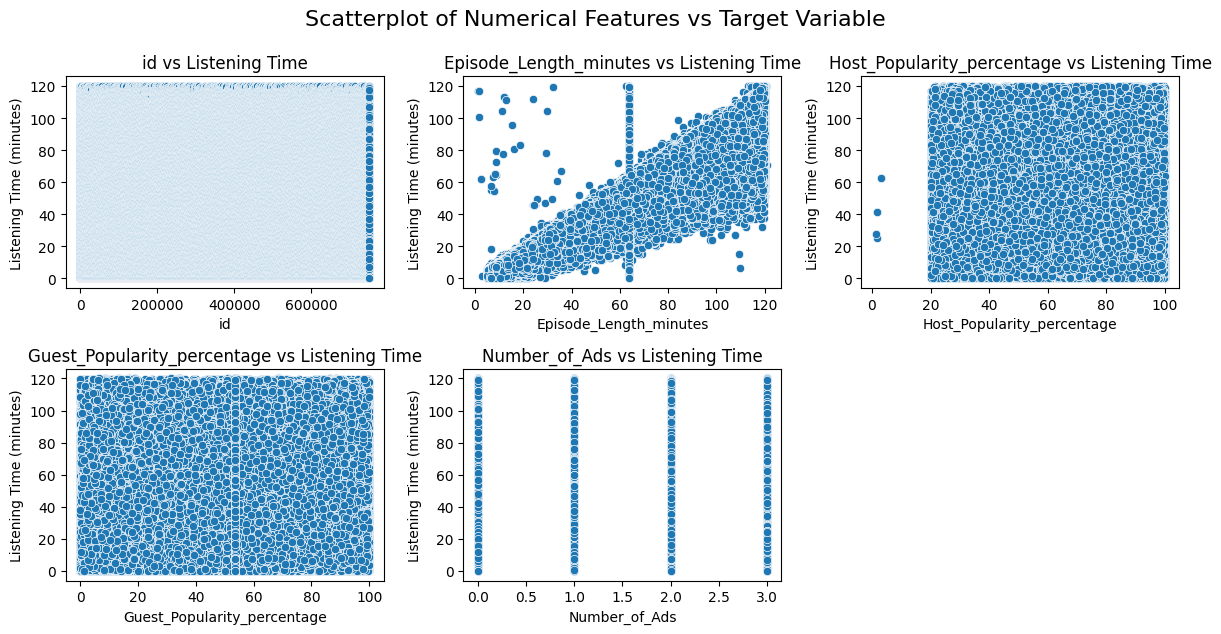

In [29]:
# Relationship between target variable and numerical features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(train_numerical_features):
    if feature == 'Listening_Time_minutes':
        continue
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=train_cleaned[feature], y=train_cleaned['Listening_Time_minutes'])
    plt.title(f"{feature} vs Listening Time")
    plt.xlabel(feature)
    plt.ylabel('Listening Time (minutes)')
plt.tight_layout()
plt.suptitle('Scatterplot of Numerical Features vs Target Variable', y=1.05, fontsize=16)
plt.show()

Note: We could see that Episode_Length_minutes has high correlation with Listening_Time_minutes

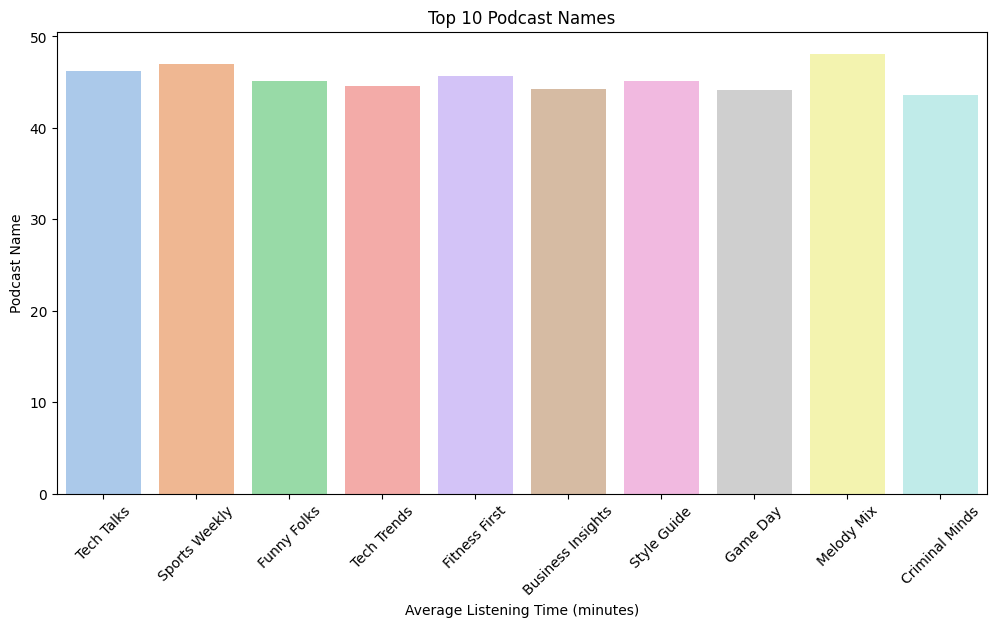

In [30]:
# Relationship between Podcast_Name and target variable
top_10_podcasts = train_cleaned['Podcast_Name'].value_counts().head(10).index
top_10_avg_listening_time = train_cleaned.groupby('Podcast_Name')['Listening_Time_minutes'].mean().loc[top_10_podcasts]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_avg_listening_time.index, y=top_10_avg_listening_time, palette='pastel')
plt.title('Top 10 Podcast Names')
plt.xlabel('Average Listening Time (minutes)')
plt.ylabel('Podcast Name')
plt.xticks(rotation=45)
plt.show()

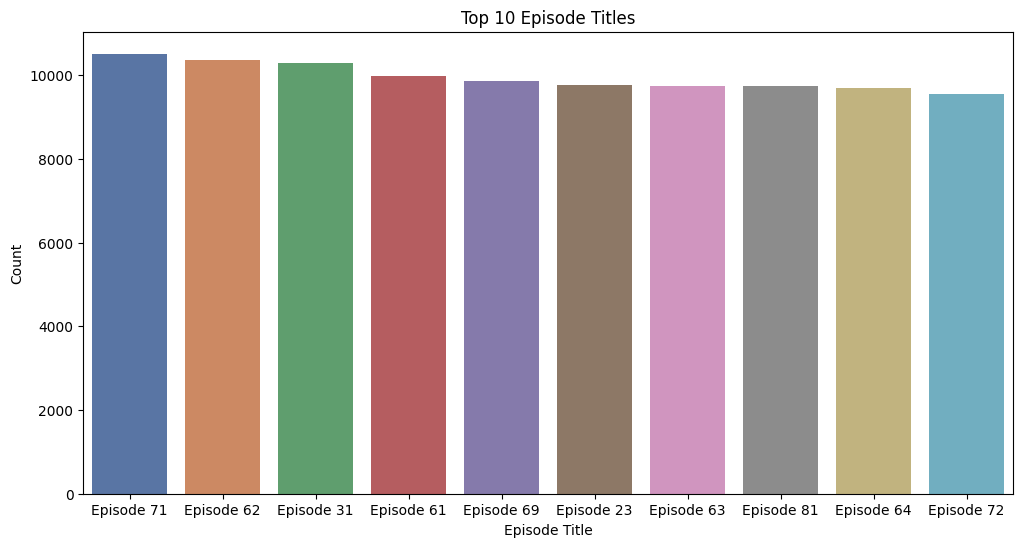

In [31]:
# Relationship between Episode_Title and target variable
top_10_episodes = train_cleaned['Episode_Title'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_episodes.index, y=top_10_episodes, palette='deep')
plt.title('Top 10 Episode Titles')
plt.xlabel('Episode Title')
plt.ylabel('Count')
plt.show()

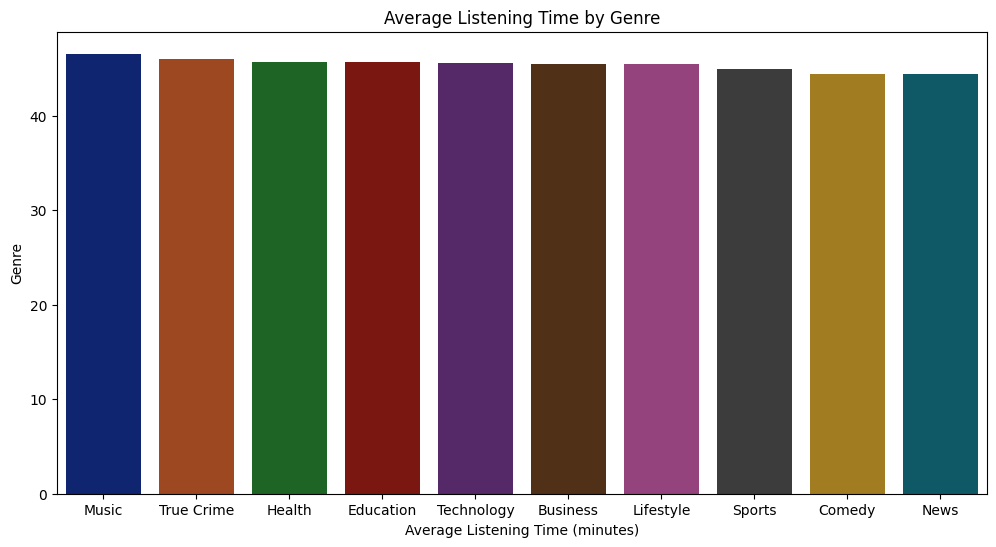

In [32]:
# Relationship between Genre and target variable
genre_avg_listening_time = train_cleaned.groupby('Genre')['Listening_Time_minutes'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_listening_time.index, y=genre_avg_listening_time, palette='dark')
plt.title('Average Listening Time by Genre')
plt.xlabel('Average Listening Time (minutes)')
plt.ylabel('Genre')
plt.show()

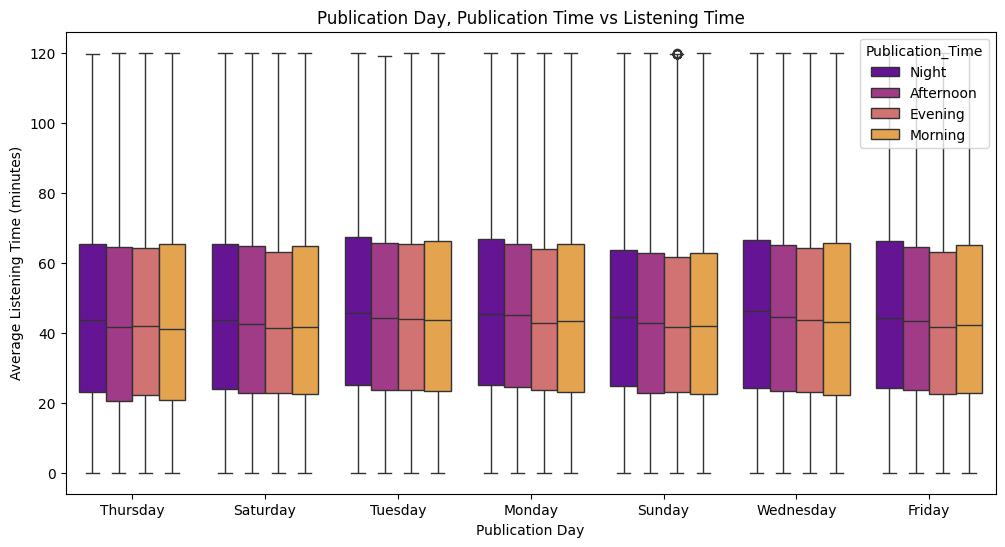

In [33]:
# Relationship between Publication Day, Publication_Time and target variable
time_avg_listening_time = train_cleaned.groupby('Publication_Time')['Listening_Time_minutes'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.boxplot(data=train_cleaned, x='Publication_Day', y='Listening_Time_minutes', hue='Publication_Time', palette='plasma')
plt.title('Publication Day, Publication Time vs Listening Time')
plt.xlabel('Publication Day')
plt.ylabel('Average Listening Time (minutes)')
plt.show()

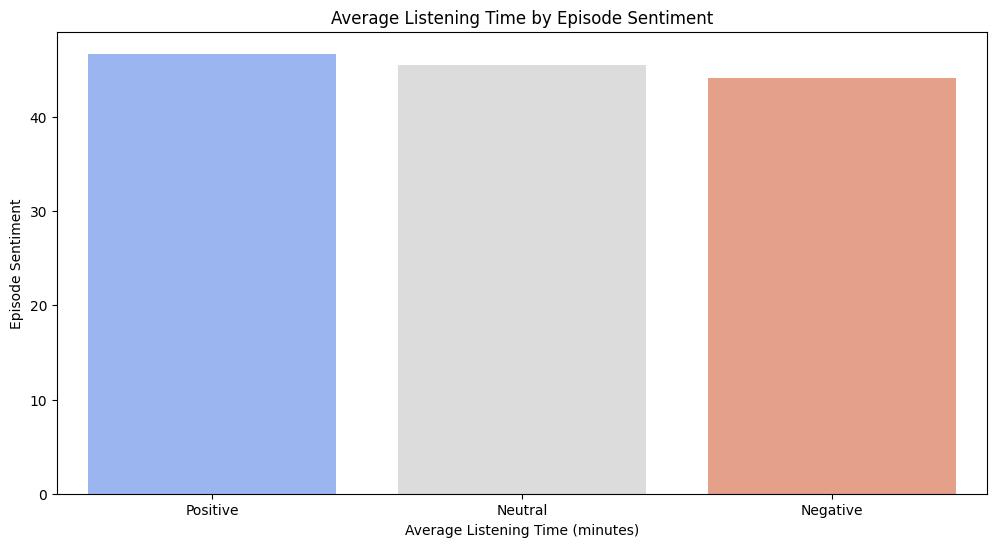

In [34]:
# Relationship between Episode_Sentiment and target variable
sentiment_avg_listening_time = train_cleaned.groupby('Episode_Sentiment')['Listening_Time_minutes'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sentiment_avg_listening_time.index, y=sentiment_avg_listening_time, palette='coolwarm')
plt.title('Average Listening Time by Episode Sentiment')
plt.xlabel('Average Listening Time (minutes)')
plt.ylabel('Episode Sentiment')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

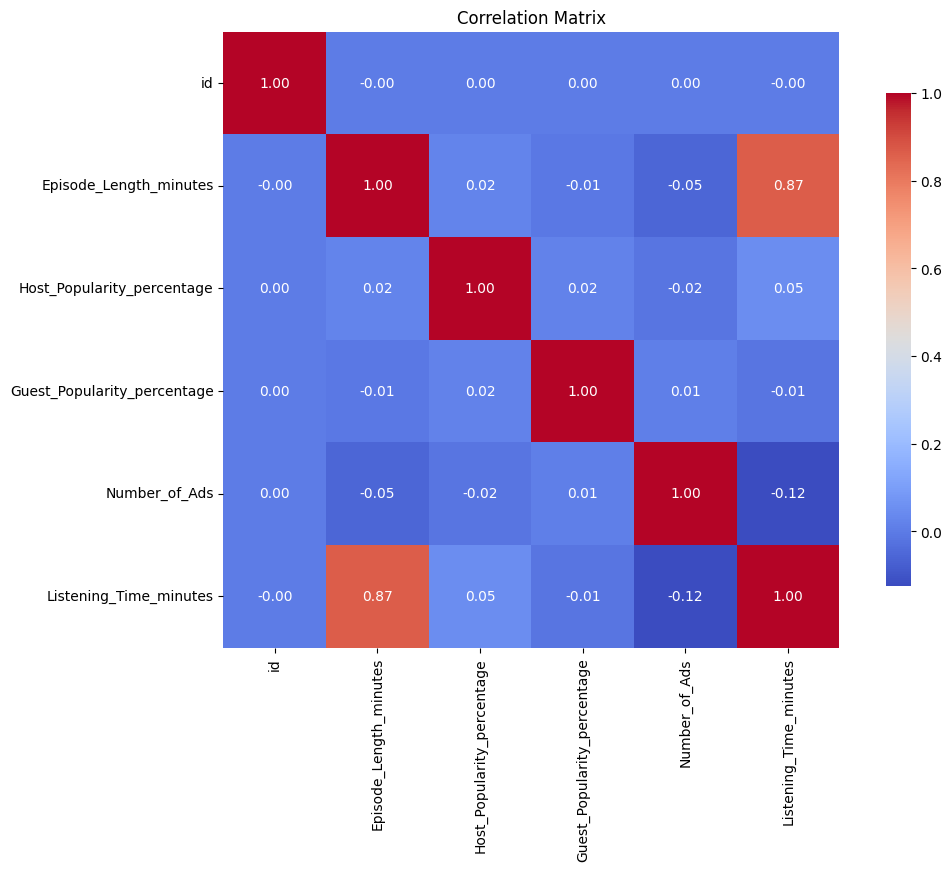

In [35]:
# Correlation matrix
df_corr = train_cleaned.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show

Note: Only Episode_Length_minutes has high correlation with the target variable, we might drop the other features later.

In [36]:
# Sort the correlation matrix
df_corr['Listening_Time_minutes'].sort_values(ascending=False)[1:]

Episode_Length_minutes         0.866252
Host_Popularity_percentage     0.050869
id                            -0.000888
Guest_Popularity_percentage   -0.014434
Number_of_Ads                 -0.124195
Name: Listening_Time_minutes, dtype: float64

## c. Feature Engineering

In [37]:
train_cleaned.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [38]:
train_engineered = train_cleaned.copy()

# Host_Guest_Popularity_union
train_engineered['Host_Guest_Popularity_union'] = train_engineered['Host_Popularity_percentage'] * train_engineered['Guest_Popularity_percentage']

# Has_Ads
train_engineered['Has_Ads'] = train_engineered['Number_of_Ads'].apply(lambda x: 1 if x > 0 else 0)

# Ads_Density
train_engineered['Ads_Density'] = train_engineered['Number_of_Ads'] / train_engineered['Episode_Length_minutes']

# Genre Popularity
genre_popularity = train_engineered.groupby('Genre')['Listening_Time_minutes'].mean().rank(ascending=False).reset_index()
train_engineered['Genre_Popularity'] = train_engineered['Genre'].map(genre_popularity.set_index('Genre')['Listening_Time_minutes'])

train_engineered.head(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Host_Guest_Popularity_union,Has_Ads,Ads_Density,Genre_Popularity
0,0,Mystery Matters,Episode 98,63.84,True Crime,74.81,Thursday,Night,53.58,0.0,Positive,31.41998,4008.3198,0,0.000000,2.0
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241,5084.8525,1,0.016694,9.0
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531,627.6309,0,0.000000,4.0
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824,4503.2140,1,0.029775,5.0
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031,4698.5076,1,0.027147,3.0
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,53.58,3.0,Positive,22.77047,2623.2768,1,0.113037,3.0
6,6,Criminal Minds,Episode 47,69.83,True Crime,35.82,Sunday,Night,39.02,0.0,Neutral,64.75024,1397.6964,0,0.000000,2.0
7,7,News Roundup,Episode 44,48.52,News,44.99,Thursday,Night,20.12,0.0,Positive,22.37517,905.1988,0,0.000000,10.0
8,8,Daily Digest,Episode 32,105.87,News,69.81,Monday,Evening,53.58,2.0,Neutral,68.00124,3740.4198,1,0.018891,10.0
9,9,Music Matters,Episode 81,63.84,Music,82.18,Thursday,Night,59.72,3.0,Neutral,45.94761,4907.7896,1,0.046992,1.0


In [39]:
train_engineered[train_engineered['Episode_Length_minutes'] == 0]

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Host_Guest_Popularity_union,Has_Ads,Ads_Density,Genre_Popularity


In [40]:
train_engineered.corr(numeric_only=True)['Listening_Time_minutes'].sort_values(ascending=False)[1:]

Episode_Length_minutes         0.866252
Host_Popularity_percentage     0.050869
Host_Guest_Popularity_union    0.019531
id                            -0.000888
Guest_Popularity_percentage   -0.014434
Genre_Popularity              -0.022106
Has_Ads                       -0.085659
Number_of_Ads                 -0.124195
Ads_Density                   -0.451493
Name: Listening_Time_minutes, dtype: float64

In [41]:
test_engineered = test_cleaned.copy()

# Host_Guest_Popularity_union
test_engineered['Host_Guest_Popularity_union'] = test_engineered['Host_Popularity_percentage'] * test_engineered['Guest_Popularity_percentage']

# Has_Ads
test_engineered['Has_Ads'] = test_engineered['Number_of_Ads'].apply(lambda x: 1 if x > 0 else 0)

# Ads_Density
test_engineered['Ads_Density'] = test_engineered['Number_of_Ads'] / test_engineered['Episode_Length_minutes']

# Genre Popularity
genre_popularity = train_engineered.groupby('Genre')['Listening_Time_minutes'].mean().rank(ascending=False).reset_index()
test_engineered['Genre_Popularity'] = test_engineered['Genre'].map(genre_popularity.set_index('Genre')['Listening_Time_minutes'])

test_engineered.head(10)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Host_Guest_Popularity_union,Has_Ads,Ads_Density,Genre_Popularity
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral,2032.4063,1,0.012665,4.0
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,53.36,0.0,Neutral,3804.0344,0,0.000000,1.0
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive,6619.9539,0,0.000000,9.0
3,750003,Comedy Corner,Episode 73,115.39,Comedy,23.40,Sunday,Morning,51.75,2.0,Positive,1210.9500,1,0.017333,9.0
4,750004,Life Lessons,Episode 50,72.32,Lifestyle,58.10,Wednesday,Morning,11.30,2.0,Neutral,656.5300,1,0.027655,7.0
5,750005,Money Matters,Episode 43,34.44,Business,77.18,Sunday,Night,53.36,0.0,Neutral,4118.3248,0,0.000000,6.0
6,750006,Mystery Matters,Episode 33,116.09,True Crime,27.57,Friday,Night,22.82,1.0,Positive,629.1474,1,0.008614,2.0
7,750007,Gadget Geek,Episode 24,54.59,Technology,94.86,Tuesday,Morning,94.76,1.0,Neutral,8988.9336,1,0.018318,5.0
8,750008,Home & Living,Episode 87,92.69,Lifestyle,75.22,Friday,Night,72.63,0.0,Neutral,5463.2286,0,0.000000,7.0
9,750009,True Crime Stories,Episode 76,100.65,True Crime,27.66,Tuesday,Evening,53.36,1.0,Negative,1475.9376,1,0.009935,2.0


## d. Feature Encoding

In [42]:
train_engineered.describe(exclude='number')

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,749989,749989,749989,749989,749989,749989
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87605,115944,196849,251284


In [43]:
train_encoded = train_engineered.copy()

# I still don't know how to handle the Podcast_Name and Episode_Title columns, so I will drop them for now
train_encoded.drop(columns=['Podcast_Name', 'Episode_Title'], inplace=True)

# One-hot encoding for Genre, Publication_Day, Publication_Time
genre_OHE = OneHotEncoder(sparse_output=False, drop='first')
genre_encoded = genre_OHE.fit_transform(train_encoded[['Genre']])

genre_df = pd.DataFrame(genre_encoded, columns=genre_OHE.get_feature_names_out(['Genre']), index=train_encoded.index)
train_encoded = pd.concat([train_encoded, genre_df], axis=1)
train_encoded.drop(columns=['Genre'], inplace=True)

# Time series mapping for Publication_Day and Publication_Time
pub_day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
train_encoded['Publication_Day'] = train_encoded['Publication_Day'].map(pub_day_mapping)

pub_time_mapping = {
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4
}
train_encoded['Publication_Time'] = train_encoded['Publication_Time'].map(pub_time_mapping)

# Ordinal Encoding for Episode_Sentiment
episode_sentiment_mapping = {
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1
}
train_encoded['Episode_Sentiment'] = train_encoded['Episode_Sentiment'].map(episode_sentiment_mapping)

train_encoded.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Host_Guest_Popularity_union,...,Genre_Popularity,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,0,63.84,74.81,4,4,53.58,0.0,1,31.41998,4008.3198,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,119.80,66.95,6,2,75.95,2.0,-1,88.01241,5084.8525,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,73.90,69.97,2,3,8.97,0.0,-1,44.92531,627.6309,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,67.17,57.22,1,1,78.70,2.0,1,46.27824,4503.2140,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,110.51,80.07,1,2,58.68,3.0,0,75.61031,4698.5076,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
train_numerical_features = train_encoded.select_dtypes(include=[np.number]).columns
train_corr = train_encoded[train_numerical_features].corr()['Listening_Time_minutes'].sort_values(ascending=False)[1:]
train_corr

Episode_Length_minutes         0.866252
Host_Popularity_percentage     0.050869
Episode_Sentiment              0.039470
Host_Guest_Popularity_union    0.019531
Publication_Time               0.015550
Genre_Music                    0.012678
Genre_True Crime               0.007977
Genre_Health                   0.003628
Genre_Education                0.002922
Genre_Technology               0.002627
Genre_Lifestyle                0.001118
id                            -0.000888
Genre_Sports                  -0.006727
Genre_News                    -0.011542
Genre_Comedy                  -0.012999
Guest_Popularity_percentage   -0.014434
Publication_Day               -0.015012
Genre_Popularity              -0.022106
Has_Ads                       -0.085659
Number_of_Ads                 -0.124195
Ads_Density                   -0.451493
Name: Listening_Time_minutes, dtype: float64

In [45]:
# # Drop the features that are not useful for the model
# train_drop = train_encoded.copy()
# train_irrelevant_features = train_corr[train_corr.abs() < 0.01].index.tolist()
# train_drop.drop(columns=train_irrelevant_features, inplace=True)
# train_drop.head()

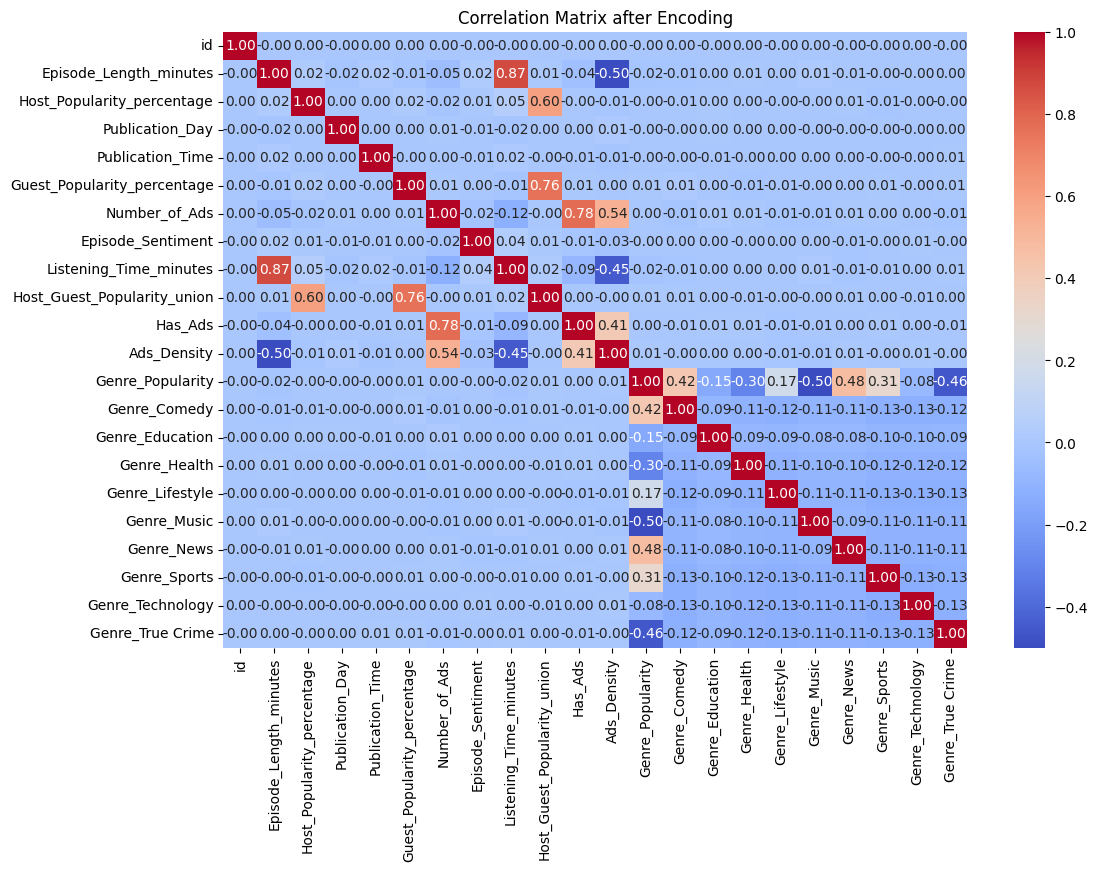

In [46]:
train_corr = train_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(train_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix after Encoding')
plt.show()

In [47]:
# Drop the features that are multicollinear
train_final = train_encoded.copy()
# train_final.drop(columns=['Host_Guest_Popularity_union', 'Number_of_Ads', 'Has_Ads', 'Genre_Popularity'], inplace=True)
train_final.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Host_Guest_Popularity_union,...,Genre_Popularity,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,0,63.84,74.81,4,4,53.58,0.0,1,31.41998,4008.3198,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,119.80,66.95,6,2,75.95,2.0,-1,88.01241,5084.8525,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,73.90,69.97,2,3,8.97,0.0,-1,44.92531,627.6309,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,67.17,57.22,1,1,78.70,2.0,1,46.27824,4503.2140,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,110.51,80.07,1,2,58.68,3.0,0,75.61031,4698.5076,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# Doing the same for the test set
test_encoded = test_engineered.copy()

test_encoded.drop(columns=['Podcast_Name', 'Episode_Title'], inplace=True)

# One-hot encoding for Genre
genre_encoded = genre_OHE.transform(test_encoded[['Genre']])
genre_df = pd.DataFrame(genre_encoded, columns=genre_OHE.get_feature_names_out(['Genre']), index=test_encoded.index)
test_encoded = pd.concat([test_encoded, genre_df], axis=1)
test_encoded.drop(columns=['Genre'], inplace=True)

# Time series mapping for Publication_Day and Publication_Time
test_encoded['Publication_Day'] = test_encoded['Publication_Day'].map(pub_day_mapping)
test_encoded['Publication_Time'] = test_encoded['Publication_Time'].map(pub_time_mapping)

# Ordinal Encoding for Episode_Sentiment
test_encoded['Episode_Sentiment'] = test_encoded['Episode_Sentiment'].map(episode_sentiment_mapping)

test_encoded.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Host_Guest_Popularity_union,Has_Ads,...,Genre_Popularity,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,750000,78.96,38.11,6,3,53.33,1.0,0,2032.4063,1,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,750001,27.87,71.29,7,1,53.36,0.0,0,3804.0344,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,750002,69.10,67.89,5,3,97.51,0.0,1,6619.9539,0,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,750003,115.39,23.40,7,1,51.75,2.0,1,1210.9500,1,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,750004,72.32,58.10,3,1,11.30,2.0,0,656.5300,1,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# test_drop = test_encoded.copy()
# test_drop.drop(columns=train_irrelevant_features, inplace=True)
# test_drop.head()

In [50]:
test_final = test_encoded.copy()
# test_final.drop(columns=['Host_Guest_Popularity_union', 'Number_of_Ads', 'Has_Ads', 'Genre_Popularity'], inplace=True)
test_final.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Host_Guest_Popularity_union,Has_Ads,...,Genre_Popularity,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,750000,78.96,38.11,6,3,53.33,1.0,0,2032.4063,1,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,750001,27.87,71.29,7,1,53.36,0.0,0,3804.0344,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,750002,69.10,67.89,5,3,97.51,0.0,1,6619.9539,0,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,750003,115.39,23.40,7,1,51.75,2.0,1,1210.9500,1,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,750004,72.32,58.10,3,1,11.30,2.0,0,656.5300,1,...,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## d. Data Split

In [51]:
X = train_final.drop(columns=['Listening_Time_minutes'])
y = train_final['Listening_Time_minutes']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, stratify=y, random_state=42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((449993, 21), (299996, 21), (449993,), (299996,))

## e. Data Scaling

In [52]:
train_encoded.head()

,id,Episode_Length_minutes,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes,Host_Guest_Popularity_union,...,Genre_Popularity,Genre_Comedy,Genre_Education,Genre_Health,Genre_Lifestyle,Genre_Music,Genre_News,Genre_Sports,Genre_Technology,Genre_True Crime
0,0,63.84,74.81,4,4,53.58,0.0,1,31.41998,4008.3198,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,119.80,66.95,6,2,75.95,2.0,-1,88.01241,5084.8525,...,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,73.90,69.97,2,3,8.97,0.0,-1,44.92531,627.6309,...,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,67.17,57.22,1,1,78.70,2.0,1,46.27824,4503.2140,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,110.51,80.07,1,2,58.68,3.0,0,75.61031,4698.5076,...,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
numerical_features = train_final.select_dtypes(include=[np.number]).columns
exclude_features = ['Publication_Day', 'Publication_Time', 'Episode_Sentiment', 'Has_Ads', 'Genre_Comedy', 'Genre_Education', 'Genre_Health',
                    'Genre_Lifestyle', 'Genre_Music', 'Genre_News', 'Genre_Sports', 'Genre_Technology', 'Genre_True Crime', 'Listening_Time_minutes']
scale_features = [feature for feature in numerical_features if feature not in exclude_features]

X_test = test_final.copy()

train_scaler = StandardScaler()
train_scaler.fit(X_train[scale_features])
X_train[scale_features] = train_scaler.transform(X_train[scale_features])
X_val[scale_features] = train_scaler.transform(X_val[scale_features])
X_test[scale_features] = train_scaler.transform(X_test[scale_features])


## f. Feature Selection

Selected features (non-zero coefficients): ['Episode_Length_minutes', 'Host_Popularity_percentage', 'Publication_Day', 'Publication_Time', 'Guest_Popularity_percentage', 'Number_of_Ads', 'Episode_Sentiment', 'Has_Ads', 'Ads_Density', 'Genre_Popularity', 'Genre_Health', 'Genre_Technology', 'Genre_True Crime']


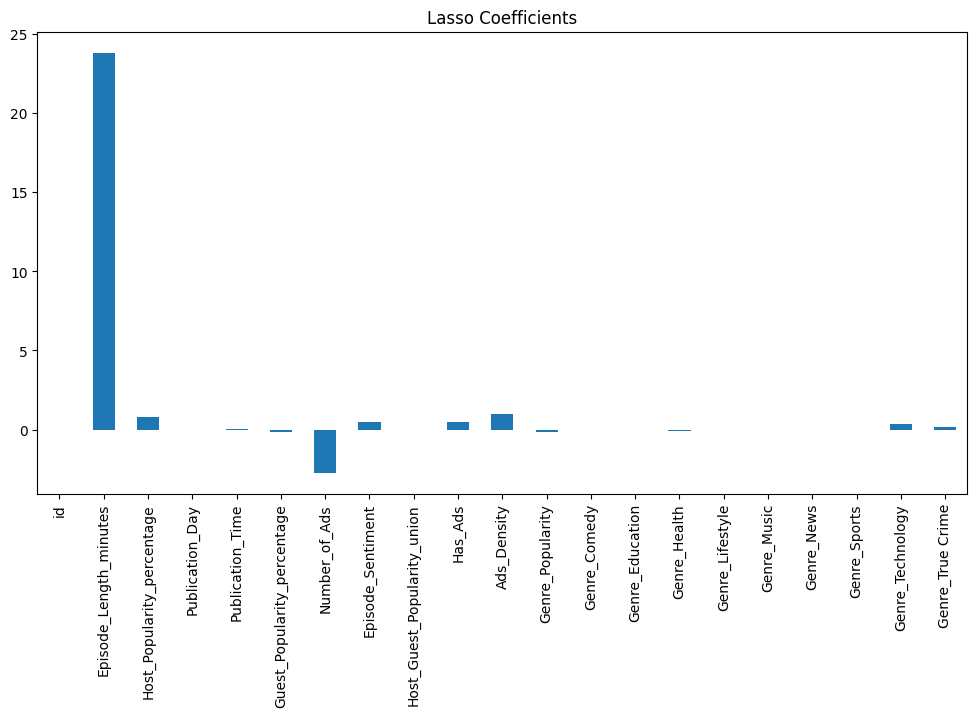

['Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Publication_Day',
 'Publication_Time',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Episode_Sentiment',
 'Has_Ads',
 'Ads_Density',
 'Genre_Popularity',
 'Genre_Health',
 'Genre_Technology',
 'Genre_True Crime']

In [54]:
# Fit LassoCV on training data
lasso = LassoCV(cv=5, random_state=42, n_jobs=-1)
lasso.fit(X_train, y_train)

# Extract and display non-zero coefficients
coef = pd.Series(lasso.coef_, index=X_train.columns)
selected_features = coef[coef != 0].index.tolist()
print("Selected features (non-zero coefficients):", selected_features)

# Plot the Lasso coefficients
plt.figure(figsize=(12, 6))
coef.plot(kind='bar')
plt.title('Lasso Coefficients')
plt.show()

selected_features

In [55]:
# Subset datasets to selected features
X_train = X_train[selected_features]
X_val = X_val[selected_features]
X_test = X_test[selected_features]

In [56]:
X_train.shape, X_val.shape, X_test.shape

((449993, 13), (299996, 13), (250000, 13))

Note: The features reduced from 21 to 13, great!

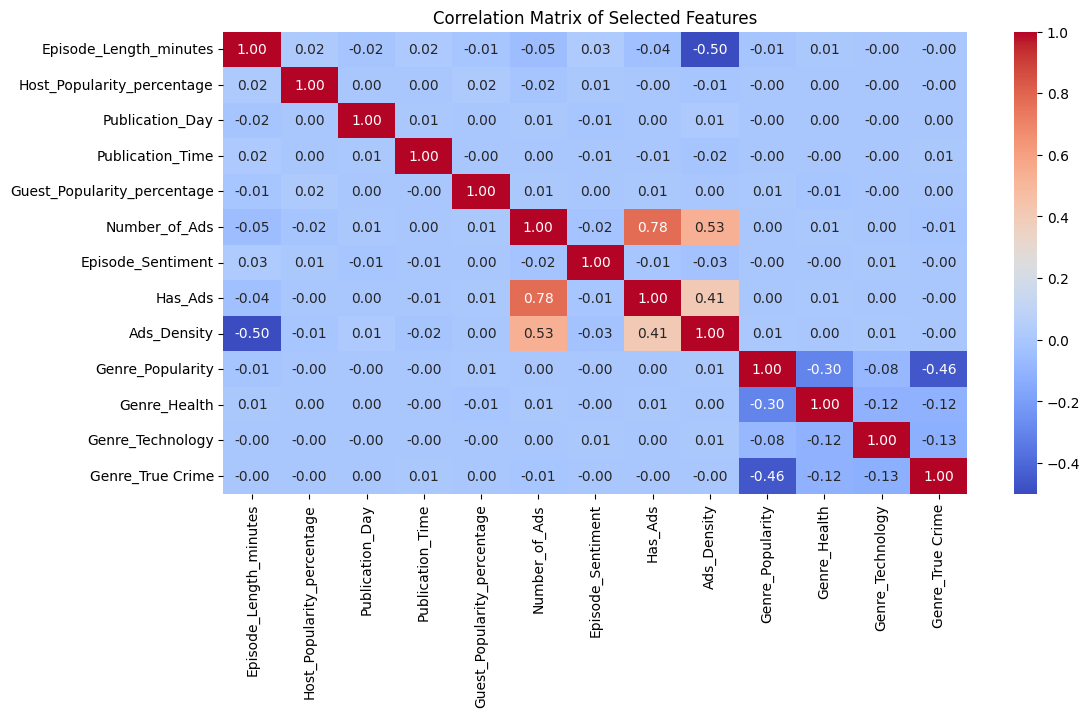

In [57]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [58]:
def highly_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr()
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

In [59]:
# Remove features with high correlation
correlated_features = highly_correlated_features(X_train, threshold=0.5)
correlated_features

{'Number_of_Ads'}

In [60]:
X_train.drop(columns=correlated_features, inplace=True)
X_val.drop(columns=correlated_features, inplace=True)
X_test.drop(columns=correlated_features, inplace=True)
X_train.shape, X_val.shape, X_test.shape

((449993, 12), (299996, 12), (250000, 12))

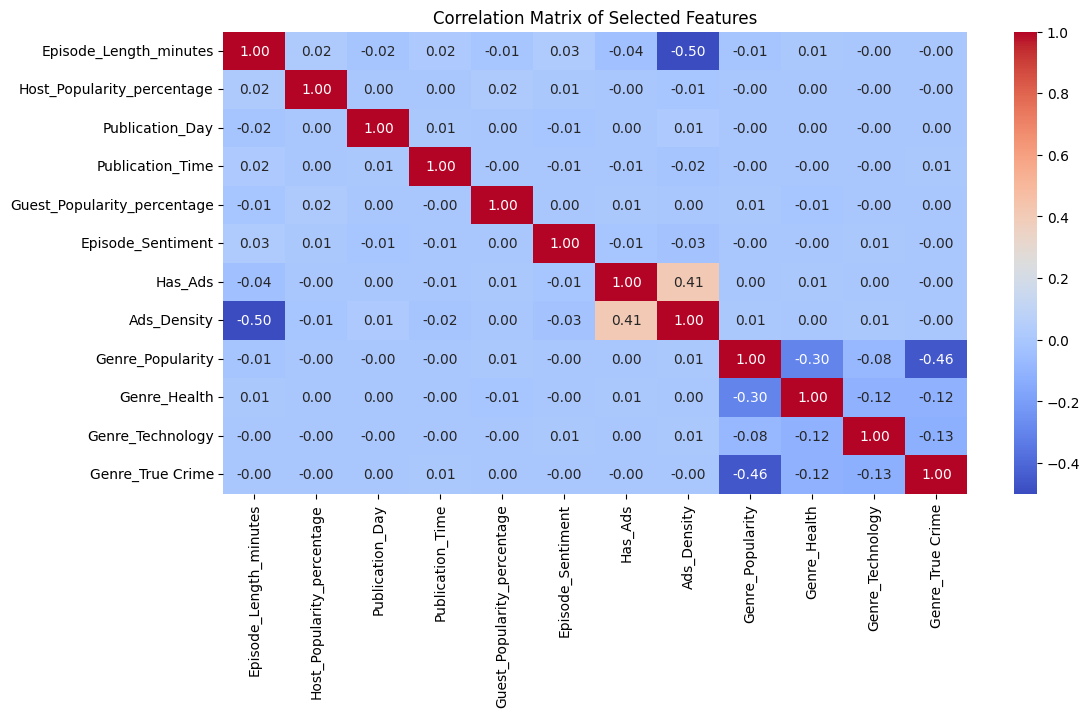

In [61]:
plt.figure(figsize=(12, 6))
sns.heatmap(X_train.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')
plt.show()

## g. Model Training

### 1) Linear Regression

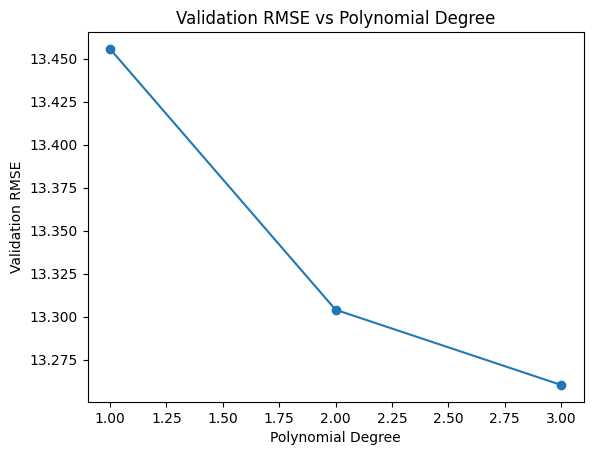

In [62]:
degrees = range(1, 4)  # Test polynomial degrees from 1 to 4
errors = []

for degree in degrees:
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('linear_regression', LinearRegression())
    ])
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_val_pred)
    errors.append(rmse)

# Plot the errors
plt.plot(degrees, errors, marker='o')
plt.title('Validation RMSE vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Validation RMSE')
plt.show()

We could see the elbow is at degree 3

In [63]:
model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=3)),
        ('linear_regression', LinearRegression())
        ])
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

print(f"Training RMSE: {root_mean_squared_error(y_train, y_train_pred):.2f}")
print(f"Training R^2: {r2_score(y_train, y_train_pred):.2f}")
print("----------------------------------------------------------------------")
print(f"Validation RMSE: {root_mean_squared_error(y_val, y_val_pred):.2f}")
print(f"Validation R^2: {r2_score(y_val, y_val_pred):.2f}")

Training RMSE: 13.23
Training R^2: 0.76
----------------------------------------------------------------------
Validation RMSE: 13.26
Validation R^2: 0.76


In [64]:
# RidgeCV
alphas = np.logspace(-4, 4, 100)
ridge = RidgeCV(alphas=alphas, cv=5, scoring='neg_root_mean_squared_error')
ridge.fit(X_train, y_train)

# Evaluate RidgeCV on validation set
y_val_pred_ridge = ridge.predict(X_val)
ridge_rmse = root_mean_squared_error(y_val, y_val_pred_ridge)
ridge_r2 = r2_score(y_val, y_val_pred_ridge)

print(f"Best alpha: {ridge.alpha_:.4f}")
print(f"RidgeCV Training RMSE: {root_mean_squared_error(y_train, ridge.predict(X_train)):.2f}")
print(f"RidgeCV Training R^2: {r2_score(y_train, ridge.predict(X_train)):.2f}")
print("----------------------------------------------------------------------")
print(f"RidgeCV Validation RMSE: {ridge_rmse:.2f}")
print(f"RidgeCV Validation R^2: {ridge_r2:.2f}")

Best alpha: 14.8497
RidgeCV Training RMSE: 13.43
RidgeCV Training R^2: 0.76
----------------------------------------------------------------------
RidgeCV Validation RMSE: 13.46
RidgeCV Validation R^2: 0.75


### 3) DT Regressor

In [74]:
dt = DecisionTreeRegressor(random_state=42)

dt_params = {
    'criterion': ['squared_error', 'friedman_mse', 'poisson'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_cv = RandomizedSearchCV(dt, dt_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
dt_cv.fit(X_train, y_train)
y_val_pred_dt = dt_cv.predict(X_val)

In [77]:
print(f"Decision Tree Best parameters: {dt_cv.best_params_}")
print(f"Decision Tree Training RMSE: {root_mean_squared_error(y_train, dt_cv.predict(X_train)):.2f}")
print(f"Decision Tree Training R^2: {r2_score(y_train, dt_cv.predict(X_train)):.2f}")
print("----------------------------------------------------------------------")
print(f"Decision Tree Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_dt):.2f}")
print(f"Decision Tree Validation R^2: {r2_score(y_val, y_val_pred_dt):.2f}")

Decision Tree Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'criterion': 'friedman_mse'}
Decision Tree Training RMSE: 13.06
Decision Tree Training R^2: 0.77
----------------------------------------------------------------------
Decision Tree Validation RMSE: 13.22
Decision Tree Validation R^2: 0.76


### 4) RF Regressor

In [ ]:
rf = RandomForestRegressor(random_state=42)

rf_params = {
    'n_estimators': [10, 30, 50, 100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

rf_cv = RandomizedSearchCV(rf, rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_cv.fit(X_train, y_train) 
y_val_pred_rf = rf_cv.predict(X_val)

In [90]:
print(f"RF Best parameters: {rf_cv.best_params_}")
print(f"RF Training RMSE: {root_mean_squared_error(y_train, rf_cv.predict(X_train)):.2f}")
print(f"RF Training R^2: {r2_score(y_train, rf_cv.predict(X_train)):.2f}")
print("----------------------------------------------------------------------")
print(f"RF Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_rf):.2f}")
print(f"RF Validation R^2: {r2_score(y_val, y_val_pred_rf):.2f}")

RF Best parameters: {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 15}
RF Training RMSE: 12.07
RF Training R^2: 0.80
----------------------------------------------------------------------
RF Validation RMSE: 13.08
RF Validation R^2: 0.77


### 5) LGBM Regressor

In [ ]:
lgbm = LGBMRegressor()

lgbm_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [2, 5, 10, 15],
    'num_leaves': [75, 125, 150],
    'min_child_samples': [20, 30, 50],
}

lgbm_cv = RandomizedSearchCV(lgbm, lgbm_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lgbm_cv.fit(X_train, y_train)
y_train_pred_lgbm = lgbm_cv.predict(X_train)
y_val_pred_lgbm = lgbm_cv.predict(X_val)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1055
[LightGBM] [Info] Number of data points in the train set: 449993, number of used features: 12
[LightGBM] [Info] Start training from score 45.433757


In [83]:
print(f"LGBM Best parameters: {lgbm_cv.best_params_}")
print(f"LGBM Training RMSE: {root_mean_squared_error(y_train, y_train_pred_lgbm):.2f}")
print(f"LGBM Training R^2: {r2_score(y_train, y_train_pred_lgbm):.2f}")
print("----------------------------------------------------------------------")
print(f"LGBM Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_lgbm):.2f}")
print(f"LGBM Validation R^2: {r2_score(y_val, y_val_pred_lgbm):.2f}")


LGBM Best parameters: {'subsample': 0.8, 'num_leaves': 125, 'n_estimators': 50, 'min_child_samples': 20, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
LGBM Training RMSE: 12.64
LGBM Training R^2: 0.78
----------------------------------------------------------------------
LGBM Validation RMSE: 13.09
LGBM Validation R^2: 0.77


### 6) XGBoost Regressor

In [87]:
xgboost = XGBRegressor()

xgboost_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [2, 5, 10, 15],
    'min_child_weight': [1, 3, 5],
}

xgboost_cv = RandomizedSearchCV(xgboost, xgboost_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgboost_cv.fit(X_train, y_train)
y_train_pred_xgboost = xgboost_cv.predict(X_train)
y_val_pred_xgboost = xgboost_cv.predict(X_val)

In [88]:
print(f"XGBoost Best parameters: {lgbm_cv.best_params_}")
print(f"XGBoost Training RMSE: {root_mean_squared_error(y_train, y_train_pred_xgboost):.2f}")
print(f"XGBoost Training R^2: {r2_score(y_train, y_train_pred_xgboost):.2f}")
print("----------------------------------------------------------------------")
print(f"XGBoost Validation RMSE: {root_mean_squared_error(y_val, y_val_pred_xgboost):.2f}")
print(f"XGBoost Validation R^2: {r2_score(y_val, y_val_pred_xgboost):.2f}")

XGBoost Best parameters: {'subsample': 0.8, 'num_leaves': 125, 'n_estimators': 50, 'min_child_samples': 20, 'max_depth': 15, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
XGBoost Training RMSE: 12.75
XGBoost Training R^2: 0.78
----------------------------------------------------------------------
XGBoost Validation RMSE: 13.11
XGBoost Validation R^2: 0.77


## h. Model Comparison

In [94]:
# Model comparison on validation set
models = {
    'Linear Regression': y_val_pred,
    'Ridge Regression': y_val_pred_ridge,
    'Decision Tree':    y_val_pred_dt,
    'Random Forest':    y_val_pred_rf,
    'LGBM':             y_val_pred_lgbm,
    'XGBoost':          y_val_pred_xgboost
}

metrics = []
for name, pred in models.items():
    rmse = root_mean_squared_error(y_val, pred)
    r2   = r2_score(y_val, pred)
    metrics.append({'Model': name, 'RMSE': rmse, 'R2': r2})

results = pd.DataFrame(metrics).set_index('Model').sort_values('RMSE')
display(results)

,RMSE,R2
Model,,
Random Forest,13.077806,0.767791
LGBM,13.086123,0.767496
XGBoost,13.113752,0.766513
Decision Tree,13.223671,0.762582
Linear Regression,13.260298,0.761265
Ridge Regression,13.455714,0.754177


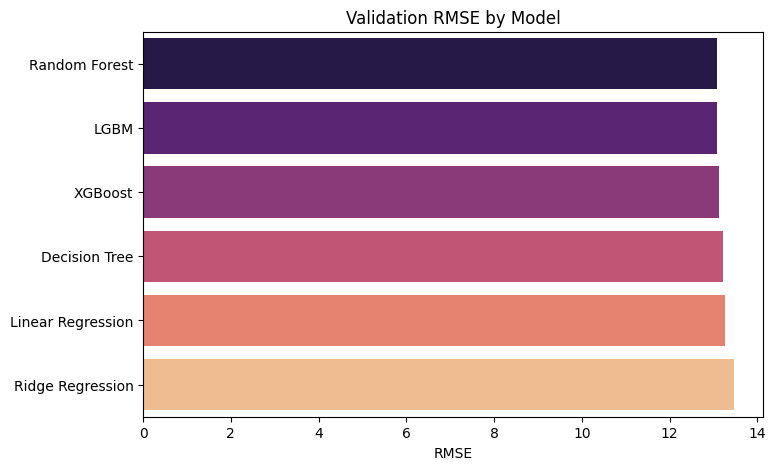

In [ ]:
# Bar plot of RMSE
plt.figure(figsize=(8, 5))
sns.barplot(x='RMSE', y=results.index, data=results.reset_index(), palette='magma')
plt.title('Validation RMSE by Model')
plt.xlabel('RMSE')
plt.ylabel('Model')
plt.show()

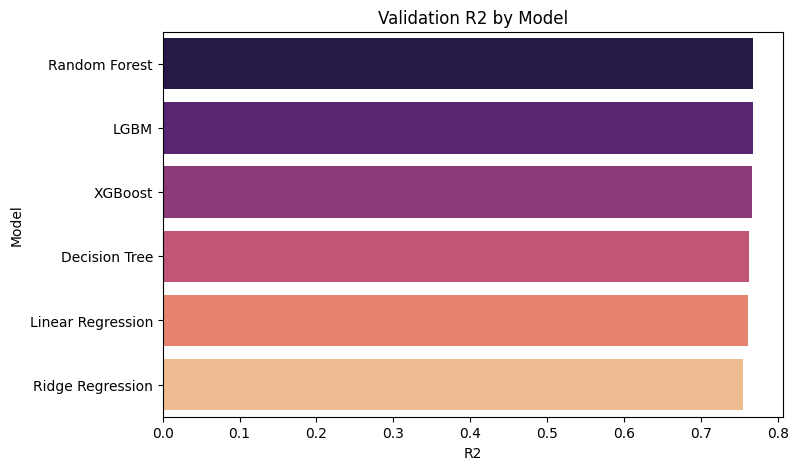

In [96]:
# Bar plot of R2
plt.figure(figsize=(8, 5))
sns.barplot(x='R2', y=results.index, data=results.reset_index(), palette='magma')
plt.title('Validation R2 by Model')
plt.xlabel('R2')
plt.ylabel('Model')
plt.show()

# 4. Conclusion and Further Improvements

- Both Random Forest and LightGBM regressors have nearly identical predictive accuracy on the validation set, achieving RMSEs of approximately 13.08 and 13.09 and R² scores of 0.7678 and 0.7675, respectively.
- Despite the marginally better RMSE of Random Forest, the performance gap is minimal. However, LightGBM’s training time (≈35 s) is significantly lower than Random Forest’s (≈4 min), making it more suitable for rapid iteration and large‐scale deployment.



For further improvements, consider:
- Hyperparameter fine‐tuning via Bayesian optimization or grid search.
- Feature importance analysis and dimensionality reduction to streamline the model.
- Cross-validation and out‐of‐fold predictions to enhance generalization and detect overfitting.